In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dof='__gm_dof'
mc_file = f"workspace/comp_sep/cmb_r0p00__dust_prior_beta_alpha__noise{dof}/data/mcmc_trial.hdf5"

In [3]:
sim_mc_filebase = "workspace/comp_sep/cmb_r0p00__dust_prior_beta_alpha__noise__gm_dof"

In [4]:
mc_dat =  h5py.File(mc_file,'r')
chi = mc_dat['chi2_eff'][...]

In [5]:
chi_sim = []
for i in range(96):
    mc_local_dat = h5py.File(f"{sim_mc_filebase}/sim{i:03}/mcmc.hdf5",'r')
    chi_sim.append(float(mc_local_dat["chi2_eff"][...]))

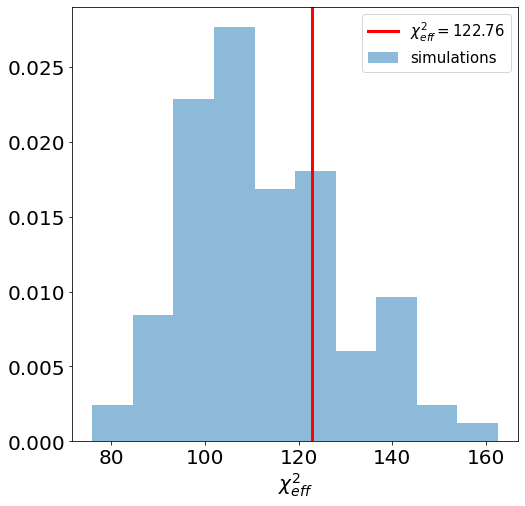

In [6]:
plt.figure(figsize=(8,8))
null = plt.hist(chi_sim,bins=10,density=True,alpha=.5,label='simulations')
plt.axvline(chi,label='$\chi_{eff}^2=$'+f"{chi:.2f}",c='r',lw=3)
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.xlabel('$\chi^2_{eff}$', fontsize='20')
plt.legend(fontsize='15')
plt.savefig(f"plots/hist{dof}.png",bbox_inches='tight')